In [1]:
!git clone https://github.com/CatEatSad/data.git

Cloning into 'data'...
remote: Enumerating objects: 3629, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3629 (delta 0), reused 3 (delta 0), pack-reused 3624
Receiving objects: 100% (3629/3629), 411.01 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (1637/1637), done.


In [2]:
%ls
!pip install tensorflow


data/  sample_data/


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob

In [56]:

#gán địa chỉ của file để load
train_image_file_path = "/content/data/drive-2/train_image"
train_image_labels_path = "/content/data/drive-2/train_labels"

In [57]:
#Hàm để lấy địa chỉ
def load_data_training(directory):
  list_data = glob.glob(directory + "/*")
  return list_data

In [58]:
#địa chỉ của ảnh được lưu vào
image_data = load_data_training(train_image_file_path)
image_data.sort()

#địa chỉ của nhãn dán đc lưu vào
labels_data = load_data_training(train_image_labels_path)
labels_data.sort()


In [59]:
print(image_data[0])
print(labels_data[0])
print(len(image_data))
print(len(labels_data))

/content/data/drive-2/train_image/carlong_0001.png
/content/data/drive-2/train_labels/carlong_0001.txt
818
818


In [60]:
#Phần này là phần load ảnh , data ở các vị trí của biển số
data = [] # list để load ảnh
targets=[] # list để load bounding của ảnh
filenames=[] # load file name của ảnh
def get_file_name(path):
  return path.split('/')[-1].split('.')[0]

def get_bounding_scale(path):
  f = open(path, "r")
  labels, x1, y1, x2, y2, x3, y3, x4, y4 = f.read().split()
  minX = float(min([x1, x2, x3, x4]))
  minY = float(min([y1, y2, y3, y4]))
  maxX = float(max([x1, x2, x3, x4]))
  maxY = float(max([y1, y2, y3, y4]))
  return (minX, minY, maxX, maxY)




In [61]:
for i in image_data:
  image = load_img(i, target_size=(224,224))
  image = img_to_array(image)
  data.append(image)
  filenames.append(get_file_name(i))



In [62]:
print(filenames[0])
print(data[0])

carlong_0001
[[[  3.   0.   0.]
  [ 16.  13.   6.]
  [ 28.  28.  18.]
  ...
  [  2.   4.   3.]
  [  2.   4.   3.]
  [  1.   3.   2.]]

 [[  3.   0.   0.]
  [  3.   0.   0.]
  [  7.   7.   0.]
  ...
  [  0.   1.   0.]
  [  0.   1.   0.]
  [  0.   1.   0.]]

 [[  4.   0.   6.]
  [  8.   3.   9.]
  [  6.   1.   5.]
  ...
  [  3.   5.   4.]
  [  3.   5.   4.]
  [  2.   4.   3.]]

 ...

 [[ 67.  34.   0.]
  [110.  82.   0.]
  [127.  97.   7.]
  ...
  [171. 125.   5.]
  [166. 132.   8.]
  [118.  90.   0.]]

 [[113.  78.   0.]
  [251. 222.  92.]
  [253. 228.  76.]
  ...
  [172. 126.   4.]
  [168. 134.   8.]
  [127.  99.   0.]]

 [[ 96.  59.   0.]
  [249. 218.  76.]
  [255. 231.  62.]
  ...
  [172. 126.   4.]
  [167. 133.   7.]
  [127.  99.   0.]]]


In [63]:
for j in labels_data:
    print(j)
    targets.append(get_bounding_scale(j))

/content/data/drive-2/train_labels/carlong_0001.txt
/content/data/drive-2/train_labels/carlong_0002.txt
/content/data/drive-2/train_labels/carlong_0003.txt
/content/data/drive-2/train_labels/carlong_0005.txt
/content/data/drive-2/train_labels/carlong_0006.txt
/content/data/drive-2/train_labels/carlong_0007.txt
/content/data/drive-2/train_labels/carlong_0008.txt
/content/data/drive-2/train_labels/carlong_0009.txt
/content/data/drive-2/train_labels/carlong_0011.txt
/content/data/drive-2/train_labels/carlong_0012.txt
/content/data/drive-2/train_labels/carlong_0013.txt
/content/data/drive-2/train_labels/carlong_0014.txt
/content/data/drive-2/train_labels/carlong_0015.txt
/content/data/drive-2/train_labels/carlong_0016.txt
/content/data/drive-2/train_labels/carlong_0017.txt
/content/data/drive-2/train_labels/carlong_0018.txt
/content/data/drive-2/train_labels/carlong_0020.txt
/content/data/drive-2/train_labels/carlong_0021.txt
/content/data/drive-2/train_labels/carlong_0023.txt
/content/dat

In [64]:
print(targets[0])
print(filenames[0])

(0.2990083905415713, 0.5528858377828629, 0.5194508009153318, 0.6464530892448512)
carlong_0001


In [65]:
data = np.array(data, dtype="float32") / 255.0
targets = np.array(targets, dtype="float32")


In [66]:
# tách data ra làm 2 phần 90% và 10% , 90 để train còn 10 để test
print(targets)
split = train_test_split(data,targets,filenames, test_size=0.10, random_state = 42)

[[0.2990084  0.55288583 0.5194508  0.6464531 ]
 [0.49504197 0.45931858 0.7017544  0.52949405]
 [0.26086956 0.62814647 0.4935164  0.7125604 ]
 ...
 [0.46602872 0.5630547  0.6325464  0.74574304]
 [0.36076555 0.5599681  0.5196172  0.7385965 ]
 [0.40789473 0.27017543 0.5598086  0.44385964]]


In [67]:
# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]

In [68]:
print("Length of trainImages:", len(trainImages))
print("Length of trainTargets:", len(trainTargets))

Length of trainImages: 736
Length of trainTargets: 736


In [69]:
#lưu lại tên những file test để có thể sử dụng cho các lần sau
print("[INFO] saving testing filenames...")
f = open("filefortest.txt", "w")
f.write("\n".join(testFilenames))
f.close()

[INFO] saving testing filenames...


In [70]:
vgg = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


In [71]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add( Dense(128, activation="relu"))
model.add( Dense(64, activation="relu"))
model.add( Dense(32, activation="relu"))
model.add( Dense(4, activation="sigmoid"))

In [72]:
vgg.trainable = False

In [73]:
opt = Adam(1e-4)
model.compile(loss = "mse", optimizer= opt, metrics = ["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3211392   
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 17936548 (68.42 MB)
Trainable params: 32

In [ ]:
# prompt: change trainTargets, testTargets , trainImages, testImages to tf.stack

# trainTargets = tf.stack(trainTargets)
# testTargets =  tf.stack(testTargets)
# trainImages =  tf.stack(trainImages)
# testImages =  tf.stack(testImages)

In [74]:

print("[INFO] training bounding box regressor...")
H = model.fit(
	trainImages, trainTargets,
	validation_data=(testImages, testTargets),
	batch_size=32,
	epochs=50,
	verbose=1)

[INFO] training bounding box regressor...
Epoch 1/50
23/23 [==============================] - 7s 175ms/step - loss: 0.0130 - accuracy: 0.6821 - val_loss: 0.0052 - val_accuracy: 0.7317
Epoch 2/50
23/23 [==============================] - 3s 150ms/step - loss: 0.0028 - accuracy: 0.8750 - val_loss: 0.0025 - val_accuracy: 0.8659
Epoch 3/50
23/23 [==============================] - 4s 164ms/step - loss: 0.0015 - accuracy: 0.9117 - val_loss: 0.0019 - val_accuracy: 0.9024
Epoch 4/50
23/23 [==============================] - 4s 165ms/step - loss: 9.6272e-04 - accuracy: 0.9402 - val_loss: 0.0015 - val_accuracy: 0.8902
Epoch 5/50
23/23 [==============================] - 4s 154ms/step - loss: 6.5583e-04 - accuracy: 0.9606 - val_loss: 0.0014 - val_accuracy: 0.9146
Epoch 6/50
23/23 [==============================] - 4s 169ms/step - loss: 4.9057e-04 - accuracy: 0.9592 - val_loss: 0.0013 - val_accuracy: 0.9390
Epoch 7/50
23/23 [==============================] - 4s 158ms/step - loss: 3.7048e-04 - accurac

In [30]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save("license_plate_detector.h5", save_format="h5")

[INFO] saving object detector model...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


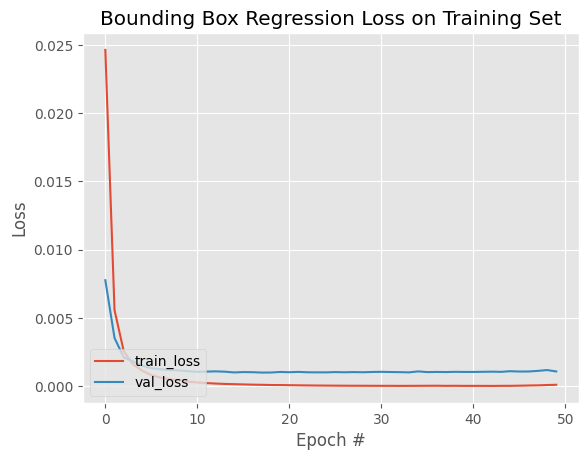

In [31]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("PLOT_PATH")

In [32]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def inference(imagePath):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # make bounding box predictions on the input image
    preds = model.predict(image)[0]
    return preds

In [52]:
def draw_bbox(img, preds):
    image = np.copy(img)
    (startX, startY, endX, endY) = preds
    (h, w) = image.shape[:2]

    # scale the predicted bounding box coordinates based on the image
    # dimensions
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w)
    endY = int(endY * h)

    # draw the predicted bounding box on the image
    cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
    return image

1/1 [==============================] - 0s 20ms/step


[0.40526047 0.47121093 0.64641315 0.55824363]


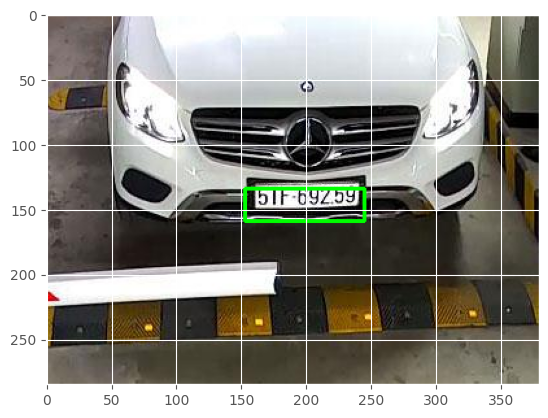

In [55]:
imagePath = '/content/carlong_0824.png'
image = plt.imread(imagePath)
preds = inference(imagePath)
image_with_bbox = draw_bbox(image, preds)
print(preds)
# show the output image
plt.imshow(image_with_bbox)